## Problem Statement
Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner) in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd  is keen to learn more about KPMG’s expertise in its Analytics, Information & Modelling team. 

Smith discusses KPMG’s expertise in this space (you can read more here). In particular, he speaks about how the team can effectively analyse the datasets to help Sprocket Central Pty Ltd grow its business.

Primarily, Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 

However, in order to support the analysis, you speak to the Associate Director for some ideas and she advised that “the importance of optimising the quality of customer datasets cannot be underestimated. The better the quality of the dataset, the better chance you will be able to use it drive company growth.”

The client provided KPMG with 3 datasets:

Customer Demographic 
Customer Addresses
Transactions data in the past 3 months

Your task is to do data check, take appropriate action in case of issues found in the data, Create 4 customer segments using RFM analysis.

All the best for the task.

## Data Description


#### Transactions table

-  transaction_id - unique id of the transaction
-  product_id - unique id of the product
-  customer_id - unique id of the customer
-  transaction_date - date of transaction
- online_order - explains was the order done online or not
- brand - name of the brand of the product
- product_line - explains what type of bike 
- product_class - class based on cost of the product
- list_price - price at which the product was sold
- standard_cost - cost price of the product

#### Customer demography
- customer id-
- first_name - first name of the customer
- last_name - last name of the customer
- gender of the customer- sex of the customer
- past 3 year bike related purchase- total number of bike related purchased done by the customer
- DOB- date of birth of the customer
- job title- job title held by the customer
- wealth segment - wealth segment to which a customer belong to
- deceased_indicator -  is the customer dead or alive
- own_car - number of cars owned by the customer

#### Customer Address

- customer_id -unique id of the customer
- postcode- post of the city customer reside in
- state- state in the country where customer reside
- country - to which country does the customer belong to


##  Necessary Import

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use ('ggplot')
import seaborn as sns



## 1.a Importing data

In [9]:
transactions=pd.read_excel(r"C:\Users\91837\Desktop\data analysis\python\eda\kpmg data\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='Transactions')


# how can i break this code for better readability

In [10]:


cust_details=pd.read_excel(r"C:\Users\91837\Desktop\data analysis\python\eda\kpmg data\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerDemographic')

In [11]:
address=pd.read_excel(r"C:\Users\91837\Desktop\data analysis\python\eda\kpmg data\KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerAddress')

In [12]:
transactions.head(2)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245


In [13]:
cust_details.head(2)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11


In [14]:
address.head(2)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10


In [15]:
# writing a udf to make first row as column header
def first_row(df,row_num):
    df.columns=df.loc[row_num].values
    df=df[1:]
    return df

In [16]:
address= first_row(address,row_num=0)

In [17]:
cust_details= first_row(cust_details,row_num=0)
transactions= first_row(transactions,row_num=0)

In [18]:
address.head(2)

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [19]:
cust_details.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16


In [20]:
transactions.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701


## 1.b Joining the data

In [21]:
final_table=cust_details.merge(address,left_on='customer_id',right_on='customer_id',how='left')\
.merge(transactions,left_on='customer_id',right_on='customer_id',how='right')

final_table.head(3).T

,0,1,2
customer_id,2950.0,3120.0,402.0
first_name,Kristos,Lauree,Berne
last_name,Anthony,O'Donnell,Donegan
gender,Male,Female,Male
past_3_years_bike_related_purchases,19,89,9
DOB,1955-01-11 00:00:00,1979-02-04 00:00:00,1977-06-03 00:00:00
job_title,Software Engineer I,Clinical Specialist,Desktop Support Technician
job_industry_category,Financial Services,Health,Retail
wealth_segment,Mass Customer,Mass Customer,Affluent Customer
deceased_indicator,N,N,N


In [22]:
final_table.shape

(20000, 30)

In [23]:
final_table.describe().T

,count,unique,top,freq
customer_id,20000.0,3494.0,2183.0,14.0
first_name,19997,2839,Corabelle,36
last_name,19355,3267,Gladman,24
gender,19997,6,Female,9993
past_3_years_bike_related_purchases,19997,100,16,291
DOB,19551,3051,1978-01-30 00:00:00,48
job_title,17603,195,Social Worker,226
job_industry_category,16768,9,Manufacturing,4014
wealth_segment,19997,3,Mass Customer,10051
deceased_indicator,19997,2,N,19989


## 2. Data Exploration

#### 2.a Checking for columns where there is only one unique value

In [24]:
final_table.country.nunique()

1

In [25]:
for column in final_table:
    print(f"the number of unique values in '{column}' = {final_table[column].nunique()}")
    print()

the number of unique values in 'customer_id' = 3494

the number of unique values in 'first_name' = 2839

the number of unique values in 'last_name' = 3267

the number of unique values in 'gender' = 6

the number of unique values in 'past_3_years_bike_related_purchases' = 100

the number of unique values in 'DOB' = 3051

the number of unique values in 'job_title' = 195

the number of unique values in 'job_industry_category' = 9

the number of unique values in 'wealth_segment' = 3

the number of unique values in 'deceased_indicator' = 2

the number of unique values in 'default' = 90

the number of unique values in 'owns_car' = 2

the number of unique values in 'tenure' = 22

the number of unique values in 'address' = 3487

the number of unique values in 'postcode' = 835

the number of unique values in 'state' = 5

the number of unique values in 'country' = 1

the number of unique values in 'property_valuation' = 12

the number of unique values in 'transaction_id' = 20000

the number of u

- "country has only one value, meaning no variance in the column. we can drop it

In [26]:
def shape_after(df,column=[]):
    print(f"shape of the data before drop = {df.shape}")
    print(f"shape of the data after drop = {df.drop(columns=column).shape}")
    

In [27]:
shape_after(final_table,column=["country"])


shape of the data before drop = (20000, 30)
shape of the data after drop = (20000, 29)


In [28]:
final_table= final_table.drop(columns='country')
final_table

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2950.0,Kristos,Anthony,Male,19,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,...,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,3120.0,Lauree,O'Donnell,Female,89,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,...,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,402.0,Berne,Donegan,Male,9,1977-06-03 00:00:00,Desktop Support Technician,Retail,Affluent Customer,N,...,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,3135.0,Titus,Worsall,Male,83,1962-01-14 00:00:00,Staff Scientist,Financial Services,Mass Customer,N,...,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
4,787.0,Norma,Batrim,Female,29,1996-12-15 00:00:00,NaN,Retail,Affluent Customer,N,...,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1018.0,Matthiew,Ferreras,Male,1,1994-11-27 00:00:00,Help Desk Operator,Manufacturing,Mass Customer,N,...,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19996,127.0,Merrili,Whitear,Female,81,1974-12-03 00:00:00,Compensation Analyst,Financial Services,Mass Customer,N,...,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19997,2284.0,Ola,Lenoir,Female,83,1974-02-16 00:00:00,Staff Accountant IV,Telecommunications,High Net Worth,N,...,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19998,2764.0,Callie,Coltart,Female,12,1955-03-29 00:00:00,NaN,Financial Services,Mass Customer,N,...,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


## checking the data types of the columns

In [29]:
print(final_table.dtypes)

customer_id                            object
first_name                             object
last_name                              object
gender                                 object
past_3_years_bike_related_purchases    object
DOB                                    object
job_title                              object
job_industry_category                  object
wealth_segment                         object
deceased_indicator                     object
default                                object
owns_car                               object
tenure                                 object
address                                object
postcode                               object
state                                  object
property_valuation                     object
transaction_id                         object
product_id                             object
transaction_date                       object
online_order                           object
order_status                      

In [30]:
for column in final_table:
    print(f"column name= '{column}'  ||  'data_Type'={final_table[column].dtypes} ||  \
    'unique value count'= {final_table[column].nunique()}  ||  sample 10 values' = {final_table[column].sample(10).unique()}")
    print()
    print()

column name= 'customer_id'  ||  'data_Type'=object ||      'unique value count'= 3494  ||  sample 10 values' = [2764.0 1569.0 859.0 1076.0 2313.0 692.0 1737.0 3070.0 864.0 3431.0]


column name= 'first_name'  ||  'data_Type'=object ||      'unique value count'= 2839  ||  sample 10 values' = ['Nigel' 'Kristien' 'Aurore' 'Isidro' 'Linell' 'Claudian' 'Charisse'
 'Dory' 'Roanne' 'Teressa']


column name= 'last_name'  ||  'data_Type'=object ||      'unique value count'= 3267  ||  sample 10 values' = ['Hatter' 'Druce' 'Antoniak' 'Hammant' 'Morfett' 'Machans' 'Laurand'
 'Mulliner' 'Guilliatt' 'Roxby']


column name= 'gender'  ||  'data_Type'=object ||      'unique value count'= 6  ||  sample 10 values' = ['Male' 'Female']


column name= 'past_3_years_bike_related_purchases'  ||  'data_Type'=object ||      'unique value count'= 100  ||  sample 10 values' = [63 75 66 87 20 4 29 31 82 71]


column name= 'DOB'  ||  'data_Type'=object ||      'unique value count'= 3051  ||  sample 10 values' = [da

- DOB needs to be date time
- past_3_years_bike_related_purchases needs to be Int64
- DOB needs to be datetime
- tenure needs to be int 64
- property evaluation needs to be int 64
-  transaction date needs to be datetime
- list_price needs to be float 64
- standard cost needs to be float 64
- product_first_sold_date needs to be datetime

In [31]:
# writing a udf which impute 0.00001 in numeric column which are object datatype. so that it becomes easy to change the datatype

def fill_object(df,col=[]):
    for value in col:
        df[value]= df[value].fillna(0.000001)
    return df

In [32]:
fill_object(final_table,col=['past_3_years_bike_related_purchases','tenure','property_valuation','list_price' ,'standard_cost'])

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2950.0,Kristos,Anthony,Male,19.0,1955-01-11 00:00:00,Software Engineer I,Financial Services,Mass Customer,N,...,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,3120.0,Lauree,O'Donnell,Female,89.0,1979-02-04 00:00:00,Clinical Specialist,Health,Mass Customer,N,...,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,402.0,Berne,Donegan,Male,9.0,1977-06-03 00:00:00,Desktop Support Technician,Retail,Affluent Customer,N,...,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,3135.0,Titus,Worsall,Male,83.0,1962-01-14 00:00:00,Staff Scientist,Financial Services,Mass Customer,N,...,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
4,787.0,Norma,Batrim,Female,29.0,1996-12-15 00:00:00,NaN,Retail,Affluent Customer,N,...,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1018.0,Matthiew,Ferreras,Male,1.0,1994-11-27 00:00:00,Help Desk Operator,Manufacturing,Mass Customer,N,...,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823
19996,127.0,Merrili,Whitear,Female,81.0,1974-12-03 00:00:00,Compensation Analyst,Financial Services,Mass Customer,N,...,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19997,2284.0,Ola,Lenoir,Female,83.0,1974-02-16 00:00:00,Staff Accountant IV,Telecommunications,High Net Worth,N,...,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410
19998,2764.0,Callie,Coltart,Female,12.0,1955-03-29 00:00:00,NaN,Financial Services,Mass Customer,N,...,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [33]:
(final_table.past_3_years_bike_related_purchases<0.1).value_counts()

False    19809
True       191
Name: past_3_years_bike_related_purchases, dtype: int64

In [34]:
## Chaning the datatypes
final_table["DOB"]= pd.to_datetime(final_table.DOB)
final_table["product_first_sold_date"]= pd.to_datetime(final_table.DOB)
final_table["transaction_date"]= pd.to_datetime(final_table.transaction_date)

final_table.astype({'past_3_years_bike_related_purchases':'float'
                   ,'tenure':'int','property_valuation':'float'
                   ,'list_price':'float'
                   ,'standard_cost':'float'})

final_table.dtypes

customer_id                                    object
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases           float64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
address                                        object
postcode                                       object
state                                          object
property_valuation                            float64
transaction_id                                 object
product_id                  

- our datatypes are correctly assigned

## 2. b  Working with missing values in some important columns

In [35]:
final_table.isnull().sum()/final_table.shape[0]


# i will drop rows date cells,first cell,last name


customer_id                            0.00000
first_name                             0.00015
last_name                              0.03225
gender                                 0.00015
past_3_years_bike_related_purchases    0.00000
DOB                                    0.02245
job_title                              0.11985
job_industry_category                  0.16160
wealth_segment                         0.00015
deceased_indicator                     0.00015
default                                0.07270
owns_car                               0.00015
tenure                                 0.00000
address                                0.00160
postcode                               0.00160
state                                  0.00160
property_valuation                     0.00000
transaction_id                         0.00000
product_id                             0.00000
transaction_date                       0.00000
online_order                           0.01800
order_status 

In [36]:
print(f"Number of rows before dropping was {final_table.shape[0]}")
print(f"after drop the number of rows are {(final_table.dropna(subset=['first_name','last_name','DOB'])).shape[0]}")
print(f"after drop the percentage of rows remained are, {(final_table.dropna(subset=['first_name','last_name','DOB']).shape[0]/final_table.shape[0])*100}\%")

Number of rows before dropping was 20000
after drop the number of rows are 18925
after drop the percentage of rows remained are, 94.625\%


In [37]:
final_table= final_table.dropna(subset=['first_name','last_name','DOB'])

final_table.shape

(18925, 29)

In [38]:
final_table.isnull().sum()/final_table.shape[0]

customer_id                            0.000000
first_name                             0.000000
last_name                              0.000000
gender                                 0.000000
past_3_years_bike_related_purchases    0.000000
DOB                                    0.000000
job_title                              0.119947
job_industry_category                  0.163435
wealth_segment                         0.000000
deceased_indicator                     0.000000
default                                0.050991
owns_car                               0.000000
tenure                                 0.000000
address                                0.001532
postcode                               0.001532
state                                  0.001532
property_valuation                     0.000000
transaction_id                         0.000000
product_id                             0.000000
transaction_date                       0.000000
online_order                           0

# 2. c checking rows for missing data

In [39]:
(final_table.isnull().sum(axis=1)/final_table.shape[1]).value_counts()

0.000000    12970
0.034483     4977
0.068966      700
0.137931      138
0.103448       76
0.172414       50
0.206897       12
0.310345        1
0.241379        1
dtype: int64

In [40]:
## Rows with more than 30% missing

final_table[(final_table.isnull().sum(axis=1)/final_table.shape[1]>.3)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
7694,23.0,Olav,Polak,Male,43.0,1995-02-10,NaN,NaN,High Net Worth,N,...,2017-04-02,True,Approved,NaN,NaN,NaN,NaN,2037.77,0.000001,1995-02-10


In [41]:
# dropping the rows from data set where value missing is more than 30%

final_table= final_table[~(final_table.isnull().sum(axis=1)/final_table.shape[1]>.3)]

final_table

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,2950.0,Kristos,Anthony,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,...,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,1955-01-11
1,3120.0,Lauree,O'Donnell,Female,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,...,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1979-02-04
2,402.0,Berne,Donegan,Male,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,...,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1977-06-03
3,3135.0,Titus,Worsall,Male,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,...,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1962-01-14
4,787.0,Norma,Batrim,Female,29.0,1996-12-15,NaN,Retail,Affluent Customer,N,...,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1996-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1018.0,Matthiew,Ferreras,Male,1.0,1994-11-27,Help Desk Operator,Manufacturing,Mass Customer,N,...,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,1994-11-27
19996,127.0,Merrili,Whitear,Female,81.0,1974-12-03,Compensation Analyst,Financial Services,Mass Customer,N,...,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,1974-12-03
19997,2284.0,Ola,Lenoir,Female,83.0,1974-02-16,Staff Accountant IV,Telecommunications,High Net Worth,N,...,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,1974-02-16
19998,2764.0,Callie,Coltart,Female,12.0,1955-03-29,NaN,Financial Services,Mass Customer,N,...,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,1955-03-29


In [42]:

final_table[(final_table.isnull().sum(axis=1)/final_table.shape[1]>.3)]

# this shows that the no row has more than 30% missing

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


## 2.d Checking values in each 'object' column and see if there needs some changes to be made

In [43]:
final_table.select_dtypes(include=['object','string']).columns



Index(['customer_id', 'first_name', 'last_name', 'gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'address', 'postcode', 'state', 'transaction_id',
       'product_id', 'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size'],
      dtype='object')

In [44]:
# gender column

print(final_table.gender.value_counts())

Female    9700
Male      9191
F           11
U            9
Femal        7
M            6
Name: gender, dtype: int64


- Inconsistency in names

In [45]:
# changing the values

final_table['gender']= final_table.gender.replace({"F":"Female","U":"Not Disclose", "Femal": "Female", "M": "Male"})

In [46]:
final_table.wealth_segment.value_counts()

Mass Customer        9536
High Net Worth       4743
Affluent Customer    4645
Name: wealth_segment, dtype: int64

In [47]:
final_table.deceased_indicator.value_counts()

N    18916
Y        8
Name: deceased_indicator, dtype: int64

In [48]:
final_table.owns_car.value_counts()

Yes    9511
No     9413
Name: owns_car, dtype: int64

In [49]:
final_table.state.value_counts()

# New South Wales is same as NSW
# Victoria is same as VIC

NSW                9650
VIC                4303
QLD                4031
New South Wales     469
Victoria            443
Name: state, dtype: int64

In [50]:
final_table['state']= np.where(final_table.state=="New South Wales","NSW",
         np.where(final_table.state=="Victoria","VIC",final_table.state
                 ))
final_table.state.value_counts()

NSW    10119
VIC     4746
QLD     4031
Name: state, dtype: int64

In [51]:
final_table.online_order.value_counts()

False    9307
True     9277
Name: online_order, dtype: int64

In [52]:
final_table.order_status.value_counts()

Approved     18754
Cancelled      170
Name: order_status, dtype: int64

In [53]:
final_table.brand.value_counts()

Solex             4036
Giant Bicycles    3138
WeareA2B          3112
OHM Cycles        2891
Trek Bicycles     2829
Norco Bicycles    2734
Name: brand, dtype: int64

In [54]:
final_table.product_line.value_counts()

Standard    13440
Road         3744
Touring      1157
Mountain      399
Name: product_line, dtype: int64

In [55]:
final_table.product_class.value_counts()

medium    13073
high       2846
low        2821
Name: product_class, dtype: int64

In [56]:
final_table.product_size.value_counts()

medium    12314
large      3756
small      2670
Name: product_size, dtype: int64

## 3. Missing values in the each column

In [57]:
for column in final_table:
    if final_table[column].isnull().sum()>0:
        print(f" missing values in '{column}' = {final_table[column].isnull().sum()}\
        || missing_pct= { 100 * ( final_table[column].isnull().sum()/final_table.shape[0] )} ")
        print()
    
    else:
        continue

 missing values in 'job_title' = 2269        || missing_pct= 11.990065525258931 

 missing values in 'job_industry_category' = 3092        || missing_pct= 16.339040372014374 

 missing values in 'default' = 965        || missing_pct= 5.099344747410695 

 missing values in 'address' = 28        || missing_pct= 0.14796026210103572 

 missing values in 'postcode' = 28        || missing_pct= 0.14796026210103572 

 missing values in 'state' = 28        || missing_pct= 0.14796026210103572 

 missing values in 'online_order' = 340        || missing_pct= 1.7966603255125766 

 missing values in 'brand' = 184        || missing_pct= 0.9723102938068061 

 missing values in 'product_line' = 184        || missing_pct= 0.9723102938068061 

 missing values in 'product_class' = 184        || missing_pct= 0.9723102938068061 

 missing values in 'product_size' = 184        || missing_pct= 0.9723102938068061 



In [58]:
missing_list= [column for column in final_table if final_table[column].isnull().sum()>0]

missing_list

['job_title',
 'job_industry_category',
 'default',
 'address',
 'postcode',
 'state',
 'online_order',
 'brand',
 'product_line',
 'product_class',
 'product_size']

- If missing values less than 5% then for numeric impute mode, else median,if missing value more than 5% impute random

In [59]:
test_df= final_table

In [60]:
test_df.isnull().sum()

customer_id                               0
first_name                                0
last_name                                 0
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                       0
job_title                              2269
job_industry_category                  3092
wealth_segment                            0
deceased_indicator                        0
default                                 965
owns_car                                  0
tenure                                    0
address                                  28
postcode                                 28
state                                    28
property_valuation                        0
transaction_id                            0
product_id                                0
transaction_date                          0
online_order                            340
order_status                              0
brand                           

In [61]:
for column in missing_list:
    print(final_table[column].dtype in ['object'])

True
True
True
True
True
True
True
True
True
True
True


In [62]:
final_table["list_price"].mode()[0]

2091.47

In [63]:
# if dataype is numeric, and missing pct less than 5% then impute with median, else with random sample
# if datatype is

for column in missing_list:
    #if final_table.select_dtypes(include=['int64', 'float64','int','float']):  this code gives data frame, you want to get column
    
    # find the columns which has numeric data type
    if final_table[column].dtype in ['int64', 'float64', 'int', 'float']:
        
        # check if missing values is less than or equal to 5%,  impute with median
        if ( 100*(final_table[column].isnull().sum()/final_table.shape[0])) <=5.0:
            final_table[column]= final_table[column].fillna(final_table[column].median())
            
            # if missing percent more than 5%, impute with random values from the column
        else :
            n= final_table[column].isnull().sum()
            random_value= final_table[column].dropna().sample(n)
            random_value.index= final_table.loc[final_table[column].isnull(),column].index
            final_table.loc[final_table[column].isnull(),column]= random_value
            
            
    # find the columns which has numeric data type
    elif final_table[column].dtype in ['object']:
        
        # if missing value less than or equal to 5% impute with mode
        if ( 100*(final_table[column].isnull().sum()/final_table.shape[0])) <=5.0:
            final_table[column]= final_table[column].fillna(final_table[column].mode()[0]) # when using mode, output is seires, use mode()[0]
            
        # if more than 5% impute with random values
        else :
            n= final_table[column].isnull().sum()
            random_value= final_table[column].dropna().sample(n)
            random_value.index= final_table.loc[final_table[column].isnull(),column].index
            final_table.loc[final_table[column].isnull(),column]= random_value
            
    else: # to take care of non numeric, non object data type
        final_table[column]= final_table[column]

In [64]:
final_table.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
default                                0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class   

## 4. Creating the RFM table

## Creating recency column in the final_table dataframe

In [65]:

final_table['recency']= (final_table['transaction_date'].max()- final_table['transaction_date']).dt.days

In [66]:
rfm_table=final_table.groupby(by=['customer_id']).agg(recency=('recency','min')).reset_index()\
.merge(final_table.groupby(by=['customer_id']).agg(frequency=('transaction_id','count'))\
       ,how='inner',left_on='customer_id',right_on='customer_id')\
.merge(final_table.groupby(by=['customer_id']).agg(total_spending=('list_price','sum')).reset_index()\
       ,how='inner',left_on='customer_id',right_on='customer_id')     



rfm_table

,customer_id,recency,frequency,total_spending
0,1.0,7,11,9084.45
1,2.0,128,3,4149.07
2,3.0,102,8,9888.23
3,5.0,16,6,5903.20
4,6.0,64,5,5931.69
...,...,...,...,...
3303,3496.0,256,4,4725.38
3304,3497.0,52,3,3744.07
3305,3498.0,127,6,5177.06
3306,3499.0,51,7,7673.48


## a. Creating RFM  Table

- what is rfm table 
- How to calculate rfm value



### What is RFM analysis

- It is a technique which is used to create segments of customers.
   - R stands for recency meaning, days since the last transactions 
   - F stands for frequency meaning, how many times did a customer bought the product
   - M stands for monetry power, meaning total spending done by customer
   
### How the value of R,F,M is calculated

- For R, we find the difference between the most recent date of transaction for a customer and subtract it from the most recent date on which the transaction was done

- For F, we simply count the number of transaction a customer did

- For M, we calculate the sum of amount spend by the customer

- For each of the R,F,M. We creates brackets based on the percentile values depending upon the category requires. In this case I used 25th, 50th, 75th, 100th percentile to create 4 score levels for each

- We add up these score using 100*R +10*F +M and we get RFM score

- Now, we find percentile value of RFM score (in this case I took) 25th,50th,75th,100th and creates customer segments such as
  - Till 25th - Bronze
  - Till 50th - Silver
  - Till 75th - GOlden
  - Till 100th - Platinum



In [67]:
print(f"[25,50,75,100] percetile of recency columnn are {np.percentile(rfm_table.recency,[25,50,75,100])}")
print()
print(f"25,50,75,100 percetile of frequency columnn are {np.percentile(rfm_table.frequency,[25,50,75,100])}")
print()
print(f" 25,50,75,100 percetile of total_spending columnns rounded to 2 decimal places are {np.percentile(rfm_table.total_spending,[25,50,75,100])}")

[25,50,75,100] percetile of recency columnn are [ 17.  44.  85. 353.]

25,50,75,100 percetile of frequency columnn are [ 4.  6.  7. 14.]

 25,50,75,100 percetile of total_spending columnns rounded to 2 decimal places are [ 4197.0625  6023.09    8190.9025 19071.32  ]


In [68]:
# creating scores using percentile values
rfm_table['recency_scorex']=np.where(rfm_table.recency <= np.percentile(rfm_table.recency,25) ,4,
         
                            np.where(rfm_table.recency <= np.percentile(rfm_table.recency,50) ,3,

                            np.where(rfm_table.recency <= np.percentile(rfm_table.recency,75),2,1
         
                            )))

# Frequency score
rfm_table['frequency_score']=np.where(rfm_table.frequency <=np.percentile(rfm_table.frequency,25),'1',
                                      
         np.where(rfm_table.frequency <=np.percentile(rfm_table.frequency,50),'2',
                  
         np.where(rfm_table.frequency <=np.percentile(rfm_table.frequency,75),'3','4'
        )))


# Monetry score
rfm_table['monetry_score']=np.where(rfm_table.total_spending <=np.percentile(rfm_table.total_spending,25),'1',
                                      
         np.where(rfm_table.total_spending <=np.percentile(rfm_table.total_spending,50),'2',
                  
         np.where(rfm_table.total_spending <=np.percentile(rfm_table.total_spending,75),'3','4'
        )))


rfm_table

,customer_id,recency,frequency,total_spending,recency_scorex,frequency_score,monetry_score
0,1.0,7,11,9084.45,4,4,4
1,2.0,128,3,4149.07,1,1,1
2,3.0,102,8,9888.23,1,4,4
3,5.0,16,6,5903.20,4,2,2
4,6.0,64,5,5931.69,2,2,2
...,...,...,...,...,...,...,...
3303,3496.0,256,4,4725.38,1,1,2
3304,3497.0,52,3,3744.07,2,1,1
3305,3498.0,127,6,5177.06,1,2,2
3306,3499.0,51,7,7673.48,2,3,3


In [69]:
# creating rfm score
rfm_table['rfm_score']=rfm_table['recency_scorex'].astype(str) + rfm_table['frequency_score'] +rfm_table['monetry_score']


# changing the datatype of rfm score
rfm_table.rfm_score=rfm_table.rfm_score.astype('float64')


rfm_table.rfm_score.dtypes

dtype('float64')

In [70]:
# unique value in rfm score column

print(f"the unique values in rfm_score columns are {rfm_table['rfm_score'].unique()}")

the unique values in rfm_score columns are [444. 111. 144. 422. 222. 344. 323. 223. 233. 333. 211. 322. 123. 134.
 112. 313. 423. 443. 133. 411. 334. 212. 243. 311. 244. 434. 234. 432.
 324. 343. 421. 122. 412. 332. 321. 312. 113. 433. 224. 442. 124. 232.
 424. 143. 121. 221. 132. 142. 213. 331. 242. 431. 413. 231. 342. 131.]


In [71]:
rfm_table

,customer_id,recency,frequency,total_spending,recency_scorex,frequency_score,monetry_score,rfm_score
0,1.0,7,11,9084.45,4,4,4,444.0
1,2.0,128,3,4149.07,1,1,1,111.0
2,3.0,102,8,9888.23,1,4,4,144.0
3,5.0,16,6,5903.20,4,2,2,422.0
4,6.0,64,5,5931.69,2,2,2,222.0
...,...,...,...,...,...,...,...,...
3303,3496.0,256,4,4725.38,1,1,2,112.0
3304,3497.0,52,3,3744.07,2,1,1,211.0
3305,3498.0,127,6,5177.06,1,2,2,122.0
3306,3499.0,51,7,7673.48,2,3,3,233.0


In [72]:
rfm_table

,customer_id,recency,frequency,total_spending,recency_scorex,frequency_score,monetry_score,rfm_score
0,1.0,7,11,9084.45,4,4,4,444.0
1,2.0,128,3,4149.07,1,1,1,111.0
2,3.0,102,8,9888.23,1,4,4,144.0
3,5.0,16,6,5903.20,4,2,2,422.0
4,6.0,64,5,5931.69,2,2,2,222.0
...,...,...,...,...,...,...,...,...
3303,3496.0,256,4,4725.38,1,1,2,112.0
3304,3497.0,52,3,3744.07,2,1,1,211.0
3305,3498.0,127,6,5177.06,1,2,2,122.0
3306,3499.0,51,7,7673.48,2,3,3,233.0


In [73]:
print(f"The 25th,50th,75th and 100th percentile value of rfm_score is {rfm_table.rfm_score.quantile(.25)}\
,{rfm_table.rfm_score.quantile(.50)} , {rfm_table.rfm_score.quantile(.75)} ,{rfm_table.rfm_score.quantile(1)}")



rfm_table['customer_segment']=np.where(rfm_table['rfm_score'] <=np.percentile(rfm_table.rfm_score,25),'Bronze customer',
         
np.where(rfm_table['rfm_score'] <=np.percentile(rfm_table.rfm_score,50),'Silver customer',
         
np.where(rfm_table['rfm_score'] <=np.percentile(rfm_table.rfm_score,75),'Golden customer','Platinum customer'
        )))

rfm_table


The 25th,50th,75th and 100th percentile value of rfm_score is 211.0,311.0 , 411.0 ,444.0


,customer_id,recency,frequency,total_spending,recency_scorex,frequency_score,monetry_score,rfm_score,customer_segment
0,1.0,7,11,9084.45,4,4,4,444.0,Platinum customer
1,2.0,128,3,4149.07,1,1,1,111.0,Bronze customer
2,3.0,102,8,9888.23,1,4,4,144.0,Bronze customer
3,5.0,16,6,5903.20,4,2,2,422.0,Platinum customer
4,6.0,64,5,5931.69,2,2,2,222.0,Silver customer
...,...,...,...,...,...,...,...,...,...
3303,3496.0,256,4,4725.38,1,1,2,112.0,Bronze customer
3304,3497.0,52,3,3744.07,2,1,1,211.0,Bronze customer
3305,3498.0,127,6,5177.06,1,2,2,122.0,Bronze customer
3306,3499.0,51,7,7673.48,2,3,3,233.0,Silver customer


## Joining the dataframe 'rfm table' with dataframe 'final_table' to show the customer rfm score in "final_table" dataframe


In [103]:
final_data=final_table.merge(rfm_table,how='left',left_on='customer_id',right_on='customer_id')

final_data

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,recency_x,recency_y,frequency,total_spending,recency_scorex,frequency_score,monetry_score,rfm_score,customer_segment,customer_type
0,2950.0,Kristos,Anthony,Male,19.0,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,...,308,75,3,1953.15,2,1,1,211.0,Bronze customer,Bronze customer
1,3120.0,Lauree,O'Donnell,Female,89.0,1979-02-04,Clinical Specialist,Health,Mass Customer,N,...,223,20,7,7351.70,3,3,3,333.0,Golden customer,Golden customer
2,402.0,Berne,Donegan,Male,9.0,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,...,75,56,6,8148.22,2,2,3,223.0,Silver customer,Silver customer
3,3135.0,Titus,Worsall,Male,83.0,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,...,121,121,7,7539.81,1,3,3,133.0,Bronze customer,Bronze customer
4,787.0,Norma,Batrim,Female,29.0,1996-12-15,Financial Advisor,Retail,Affluent Customer,N,...,90,75,10,11292.54,2,4,4,244.0,Silver customer,Silver customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,1018.0,Matthiew,Ferreras,Male,1.0,1994-11-27,Help Desk Operator,Manufacturing,Mass Customer,N,...,189,26,5,6164.88,3,2,3,323.0,Golden customer,Golden customer
18920,127.0,Merrili,Whitear,Female,81.0,1974-12-03,Compensation Analyst,Financial Services,Mass Customer,N,...,51,23,10,9949.62,3,4,4,344.0,Golden customer,Golden customer
18921,2284.0,Ola,Lenoir,Female,83.0,1974-02-16,Staff Accountant IV,Telecommunications,High Net Worth,N,...,260,34,7,7556.94,3,3,3,333.0,Golden customer,Golden customer
18922,2764.0,Callie,Coltart,Female,12.0,1955-03-29,Dental Hygienist,Financial Services,Mass Customer,N,...,180,51,4,3651.92,2,1,1,211.0,Bronze customer,Bronze customer


In [107]:
for column in final_data:
    print(f"dtype= {column,final_data[column].dtypes}   ||   missing value= {final_data[column].isnull().sum()}  ||  \
    unique value {final_data[column].nunique()}   ||\
     10 sample values {final_data[column].sample(10)}")
    print("-----------------------------")
    print()

dtype= ('customer_id', dtype('O'))   ||   missing value= 0  ||      unique value 3308   ||     10 sample values 11086    3432.0
1807     1399.0
3932      865.0
14043    2621.0
10100     317.0
12929    2851.0
10486    1171.0
4312      785.0
527      2826.0
11637     330.0
Name: customer_id, dtype: object
-----------------------------

dtype= ('first_name', dtype('O'))   ||   missing value= 0  ||      unique value 2721   ||     10 sample values 11970     Thornie
580         Tiffi
5371       Leigha
13882       Robin
16945        Myca
7111      Quillan
8739      Marcile
10890      Waylin
11588    Krystyna
17338        Burr
Name: first_name, dtype: object
-----------------------------

dtype= ('last_name', dtype('O'))   ||   missing value= 0  ||      unique value 3198   ||     10 sample values 2             Donegan
8808            Tutin
13742        Ramsdell
16921         Phillps
5179         Zisneros
18327    Meaddowcroft
18042        Andrioni
11027           Peele
11356          McKune
14

## EDA

In [ ]:
#Ploting the heatmap for the correlation matrix
plt.figure(figsize=(15,12))
sns.heatmap(final_data.corr(),annot=True, cmap='coolwarm')

- What to interpret what to conclude

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# univariate bar
px= sns.countplot(final_data['gender'])


for bar in px.containers:
    px.bar_label(bar)
    
# Rotate the x_tick labels by 45 degrees
plt.xticks(rotation=45)    

# title,x and y label
plt.title("Customers By Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

Text(0, 0.5, 'Amount')

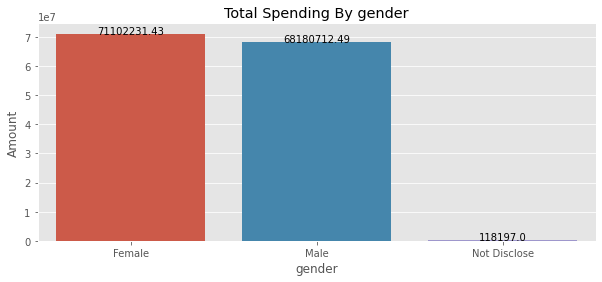

In [68]:
df = final_data.groupby(by="gender").agg(Amount=("total_spending","sum")).reset_index()

plt.figure(figsize=(10,4))

sns.barplot(x="gender", y="Amount", data=df)

# Iterate over the rows of `df` using `iterrows()`
for index, row in df.iterrows():
    plt.text(index, row.Amount+0.4, f"{row.Amount}", ha="center")

plt.title("Total Spending By gender")
plt.xlabel("gender")
plt.ylabel("Amount")

- Female and Male spends significantly large amount, this is due the the fact that number of Females and Males are more than the gender type= "Not Disclosed

Text(0, 0.5, 'Amount')

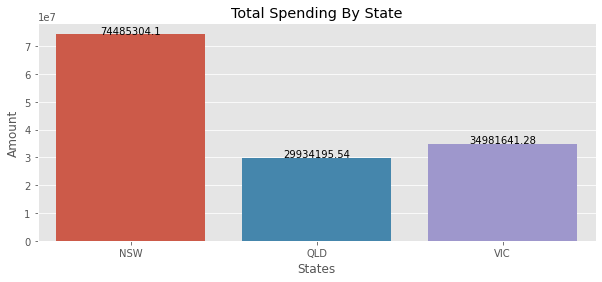

In [69]:
df= final_data.groupby(by="state").agg(Amount=("total_spending","sum")).reset_index()

plt.figure(figsize=(10,4))

sns.barplot(x="state",y="Amount",data=df)   # why my bar size is not changing

for index,row in df.iterrows():
    plt.text(index,row.Amount+0.4,f'{row.Amount}',ha="center")
    
plt.title("Revenue By State")


plt.title("Total Spending By State")
plt.xlabel("States")
plt.ylabel("Amount")

- NSW is the state which generates the highest revenue, and VIC is the scecond. Though significantly lower than NSW

Text(0, 0.5, 'Amount')

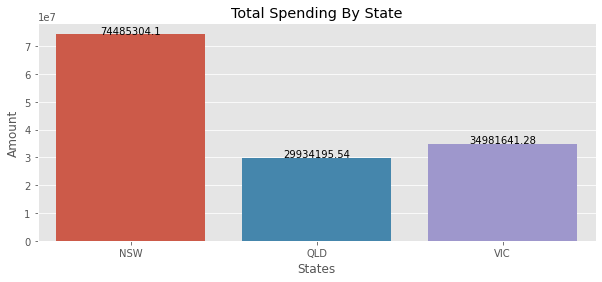

In [82]:
df= final_data.groupby(by="state").agg(Amount=("total_spending","sum")).reset_index()

plt.figure(figsize=(10,4))

sns.barplot(x="state",y="Amount",data=df)

for index,row in df.iterrows():
    plt.text(index,row.Amount+0.4,f'{row.Amount}',ha="center")
    
plt.title("Revenue By State")


plt.title("Total Spending By State")
plt.xlabel("States")
plt.ylabel("Amount")


Text(0.5, 1.0, 'Revenue By State')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


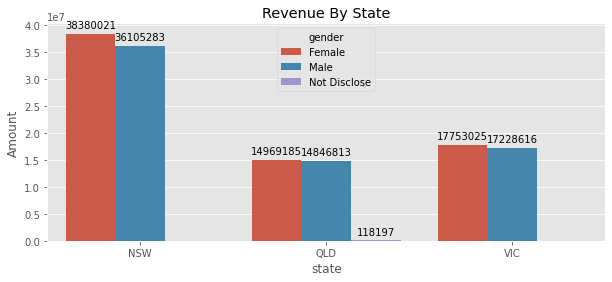

In [83]:
df= final_data.groupby(by=["state","gender"]).agg(Amount=("total_spending","sum")).reset_index()

plt.figure(figsize=(10,4))
px= sns.barplot(x="state",y="Amount",hue="gender",data=df)

#for bar in px.containers:
#    px.bar_label(bar)


for p in px.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() + 1000000
    value = f'{p.get_height():.0f}'
    plt.text(x, y, value, ha='center')    

plt.title("Revenue By State")


# how to seprate bars from each otehr

# how to show values on bar using plt.text()  - use p in px.patch

- Females lead Males in terms of spending in each state. Although the difference is not significantly large

In [72]:
final_data.transaction_date.values

array(['2017-02-25T00:00:00.000000000', '2017-05-21T00:00:00.000000000',
       '2017-10-16T00:00:00.000000000', ...,
       '2017-04-14T00:00:00.000000000', '2017-07-03T00:00:00.000000000',
       '2017-09-22T00:00:00.000000000'], dtype='datetime64[ns]')

## Total Revenue By Year

In [73]:
df= final_data.loc[:,["transaction_date","total_spending"]]

df["year"]= df.transaction_date.dt.year

df["month_num"]= df.transaction_date.dt.month

df["month"]= df.transaction_date.dt.month_name()

df["month_year"]= df.month.str.slice(0,3)+"-"+df.year.apply(lambda x: str(x)[2:4])

df

,transaction_date,total_spending,year,month_num,month,month_year
0,2017-02-25,1953.15,2017,2,February,Feb-17
1,2017-05-21,7351.70,2017,5,May,May-17
2,2017-10-16,8148.22,2017,10,October,Oct-17
3,2017-08-31,7539.81,2017,8,August,Aug-17
4,2017-10-01,11292.54,2017,10,October,Oct-17
...,...,...,...,...,...,...
18919,2017-06-24,6164.88,2017,6,June,Jun-17
18920,2017-11-09,9949.62,2017,11,November,Nov-17
18921,2017-04-14,7556.94,2017,4,April,Apr-17
18922,2017-07-03,3651.92,2017,7,July,Jul-17


In [74]:
df= df.groupby(by=["month_num","month_year"]).agg(revenue=("total_spending","sum")).reset_index()
df

,month_num,month_year,revenue
0,1,Jan-17,11492240.18
1,2,Feb-17,11342957.19
2,3,Mar-17,11316971.32
3,4,Apr-17,11655695.62
4,5,May-17,11964374.90
5,6,Jun-17,11014622.77
6,7,Jul-17,11831961.97
7,8,Aug-17,12062063.20
8,9,Sep-17,11008967.90
9,10,Oct-17,12375042.59


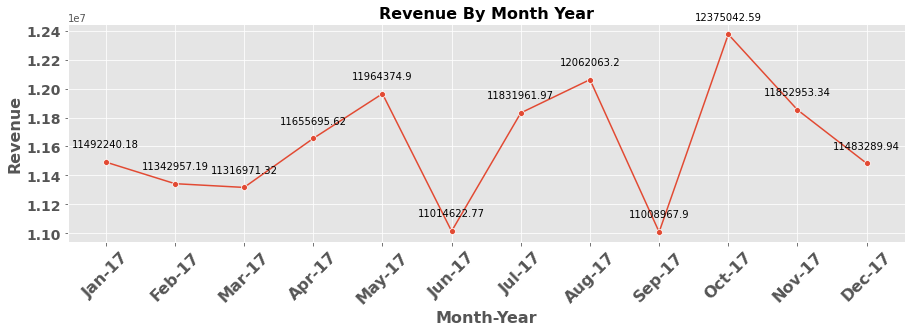

In [75]:
plt.figure(figsize=(15,4))
sns.lineplot(x="month_year",y="revenue",data=df,marker="o",)


for index, row in df.iterrows():
    plt.text(index, row.revenue+100000, f"{row.revenue}", ha="center")

plt.xticks(rotation=45,fontsize=16,fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
#px.set_xticklabels(px.get_xtickslabels(),rotation=45);
plt.title("Revenue By Month Year",fontsize=16,fontweight='bold')
plt.xlabel("Month-Year",fontsize=16,fontweight='bold')
plt.ylabel("Revenue",fontsize=16,fontweight='bold')


plt.show()

- Revenue in October was the highest.
   - Possible reason for this can be- October is the onset of spring in Australia. And people prefer out door activity from October onwards.
   -  National Ride2Work Day is held in Australia during October. Hence it is natural that the bike sales increases in October
   
- There is a sharp decline in June compared to May and September compared to August
   -  for decline in sales in June, the possible reason can be onset of winter season
   -  it's also possible that bike stores and manufacturers may offer more promotions, discounts, or special deals during May and August to encourage sales, which could explain the higher sales during those months.

In [85]:
# creating dataframe
df= final_data.loc[:,["transaction_date","total_spending","list_price","standard_cost"]]
    
df["profit"]= df["list_price"]-df["standard_cost"]

df["year"]= df.transaction_date.dt.year

df["month_num"]= df.transaction_date.dt.month

df["month"]= df.transaction_date.dt.month_name()

df["month_year"]= df.month.str.slice(0,3)+"-"+df.year.apply(lambda x: str(x)[2:4])


# group by 
df_revenue= df.groupby(by=["month_num","month_year"]).agg(revenue=("total_spending","sum")).reset_index()

df_profit= df.groupby(by=["month_num","month_year"]).agg(total_profit=("profit","sum")).reset_index()



# concat revenue and profit
df_concat= pd.concat([df_revenue, df_profit.drop(["month_num"], axis=1)], axis=1)


# any better way to drop the month__year
#df_concat.columns= ["month_num","month_year_x","revenue","month_year","total_proft"]

df_concat= df_concat.iloc[:,[0,1,2,4]]    # any better way to drop the column by using the name
                                   # can i drop using index number ?
    



In [86]:
#sns.barplot(data=df_concat, x="month_year", y="total_profit", color="green")  why giving error

# can you plot clustered bar between the percentage of revenue vs profit

In [87]:
df_concat["revenue_contri"]= df_concat["revenue"].apply( lambda x: np.round( 100*(x/df_concat["revenue"].sum()),2 ) )
df_concat["profit_conctri"]= df_concat["total_profit"].apply( lambda x: np.round( 100*(x/df_concat["total_profit"].sum()),2 ) )

df_concat

,month_num,month_year,revenue,total_profit,revenue_contri,profit_conctri
0,1,Jan-17,11492240.18,884125.849985,8.24,8.39
1,2,Feb-17,11342957.19,843465.019989,8.14,8.00
2,3,Mar-17,11316971.32,854114.409976,8.12,8.10
3,4,Apr-17,11655695.62,871900.409987,8.36,8.27
4,5,May-17,11964374.90,881219.939982,8.58,8.36
5,6,Jun-17,11014622.77,823706.199985,7.90,7.82
6,7,Jul-17,11831961.97,912093.029984,8.49,8.66
7,8,Aug-17,12062063.20,927379.469986,8.65,8.80
8,9,Sep-17,11008967.90,829298.509988,7.90,7.87
9,10,Oct-17,12375042.59,957640.159981,8.88,9.09


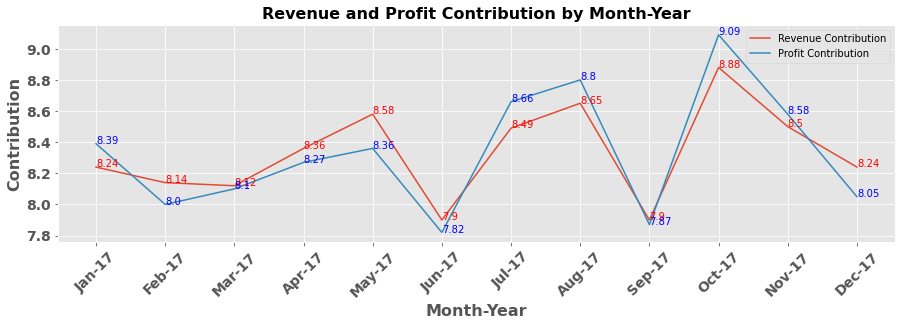

In [88]:
plt.figure(figsize=(15,4))

sns.lineplot(x="month_year",y="revenue_contri",data=df_concat,label="Revenue Contribution")
sns.lineplot(x="month_year",y="profit_conctri",data=df_concat, label="Profit Contribution")

for index, row in df_concat.iterrows():
    plt.text(row['month_year'], row['revenue_contri'], round(row['revenue_contri'],2), color='red')
    plt.text(row['month_year'], row['profit_conctri'], round(row['profit_conctri'],2), color='blue')

plt.xlabel("Month-Year",fontsize=16,fontweight='bold')
plt.ylabel("Contribution",fontsize=16,fontweight='bold')
plt.title("Revenue and Profit Contribution by Month-Year",fontsize=16,fontweight='bold')
plt.legend()


plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.show()


No handles with labels found to put in legend.


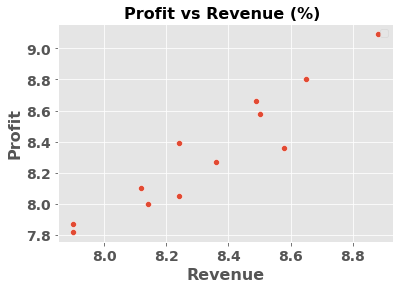

In [96]:
sns.scatterplot(x='revenue_contri', y='profit_conctri', data=df_concat)

plt.xlabel("Revenue",fontsize=16,fontweight='bold')
plt.ylabel("Profit",fontsize=16,fontweight='bold')
plt.title("Profit vs Revenue (%) ",fontsize=16,fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.legend()



- There is a corrleation between revenue and profit. As revenue increases profits increases

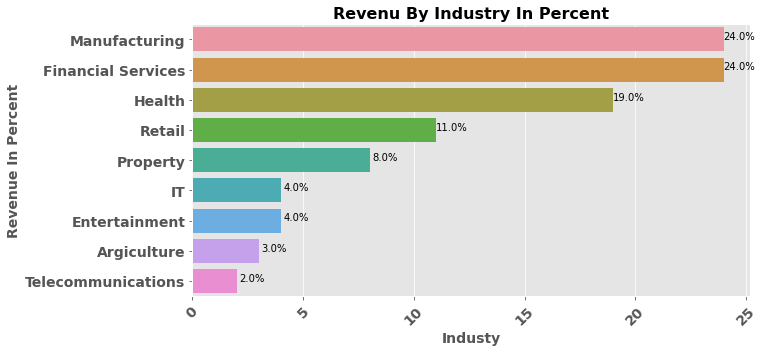

In [80]:
## Which Industry generating the most revenue

df= final_data.groupby(by="job_industry_category").agg(revenue=("total_spending","sum")).sort_values(by="revenue",ascending=False).reset_index()
df["revenue_pct"]= pd.DataFrame(df.revenue.apply(lambda x: np.round( (x/df.revenue.sum()),2 )*100))
plt.figure(figsize=(10,5))
sns.barplot(x="revenue_pct",y="job_industry_category",data= df)


for index, row in df.iterrows():
    plt.text(row.revenue_pct+.7, index, f"{row.revenue_pct}%", ha="center")
    

plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')


plt.title("Revenu By Industry In Percent",fontsize=16,fontweight='bold');
plt.xlabel("Industy", fontsize=14, fontweight='bold')
plt.ylabel("Revenue In Percent", fontsize=14, fontweight='bold');


plt.xticks(rotation=45, fontsize=14, fontweight='bold')

plt.show()


- Manufacturing, Financial Services, and Health are the top 3 revenue genrating industry
- The possible reason I can think for this can be
   - inter premise commute , Awarness about health and environment

EDA is complete

## Summary

1. Females spends slightly more than males
2. Female customers are slightly more than male customer
3. NSW generates highest revenue
4. Top 3 industries are Manufactring, health, financial serivces

- For additional EDA please refer  the pdf report in xyz folder